<a href="https://colab.research.google.com/github/ZahidHasanStat/ML-Algorithms/blob/main/pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This a demostration of a different machine learning Algorithm with python.The 'Indian Pima diabetes' dataset is used here.Several machine learning model was build to predict the state of diabetes.At the end Roc & Auc is used to compare the different models.

Zahid Hasan

Department of Statistic

Islamic University

In [62]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#reading data
pima=pd.read_csv('diabetes.csv')

In [64]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
#declaring variables
inputs = pima.drop('Outcome',axis='columns')
target = pima.Outcome

In [66]:
#spliting the data for validation
from sklearn.model_selection import train_test_split
#Test set=20%
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=1)

In [67]:
print(len(X_train))
print(len(X_test))

614
154


In [68]:
#Importing different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
lr=LogisticRegression()
svc=LinearSVC()
rfc=RandomForestClassifier()
dt = tree.DecisionTreeClassifier()

In [69]:
#Fitting Decision Trees
dt.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
#Fitting Logistic Regression
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
#Fitting Random Forest Classifier
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
#Fitting SVM
svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [73]:
#Predicting on test data
y_dt=dt.predict(X_test)
y_lr=lr.predict(X_test)
y_rfc=rfc.predict(X_test)
y_svc=svc.predict(X_test)

In [74]:
dt.score(X_test,y_test)

0.7077922077922078

In [75]:
svc.score(X_test,y_test)

0.6753246753246753

In [76]:
rfc.score(X_test,y_test)

0.7857142857142857

In [77]:
lr.score(X_test,y_test)

0.7792207792207793

In [78]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

[[89 10]
 [24 31]]


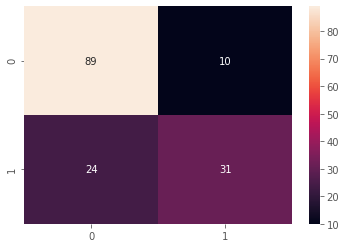

In [79]:
#cm for Logistic Regression
cf_lr = confusion_matrix(y_test, y_lr)
print(cf_lr)
sns.heatmap(cf_lr, annot=True)

[[78 21]
 [24 31]]


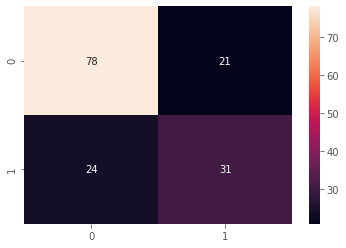

In [80]:
#cm for Decision Tree
cf_dt = confusion_matrix(y_test, y_dt)
print(cf_dt)
sns.heatmap(cf_dt, annot=True)

[[86 13]
 [20 35]]


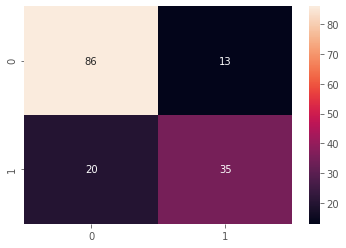

In [81]:
#cm for Random Forest
cf_rfc = confusion_matrix(y_test, y_rfc)
print(cf_rfc)
sns.heatmap(cf_rfc, annot=True)

[[99  0]
 [50  5]]


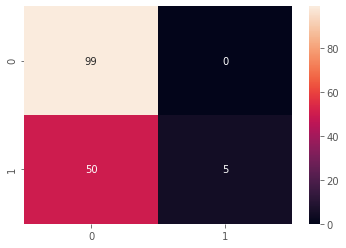

In [82]:
#cm for SVM
cf_svc = confusion_matrix(y_test, y_svc)
print(cf_svc)
sns.heatmap(cf_svc, annot=True)

In [83]:
#fpr=false positive Rate,tpr=True positive Rate
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

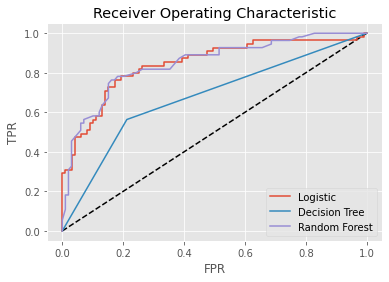

In [84]:
#ROC Curve
plt.style.use('ggplot')
from sklearn.metrics import roc_curve
y_pred_prob1 = lr.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = dt.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = rfc.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "Random Forest")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()